The idea of this notebook is to develop a basic understanding of how `numpy` works, and how to use it properly. First of all, let's import numpy.

In [1]:
import numpy as np

Numpy has a bunch of convenient mathematical functions built-in. Let's compute $\sin(\pi/2)$, $\cos(\pi/2)$, $\tan(\pi/2)$. You'll see how $\cos(\pi/2)$ is only approximately zero and $\tan(\pi/2)$ is a huge number, so be careful about this!

In [2]:
print(np.sin(np.pi/2),np.cos(np.pi/2), np.tan(np.pi/2))

1.0 6.123233995736766e-17 1.633123935319537e+16


The basic numpy data structure is the array, which is similar to the built-in python list, but much more efficient.

In [3]:
print(np.arange(1,100,1))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]


You can index a numpy array in many different ways, for example:
- Using single indices and slices, like you would a Python list
- Using an array or list of indices
- Using booleans (`True`, `False`) and conditions

In [4]:
a = np.arange(1,100,1)
print("Slicing and indexing:")
print(a[1], a[1:10])
# Using a list to index the array:
print("Indexing using a list:")
print(a[[0,1,2,3]])
#Let's now take only places where a < 10. There are two ways of doing this:
print("Condition a < 10. Where is it true?")
print(a < 10, np.where(a < 10))
print("Indexing using the condition:")
print(a[a<10], a[np.where(a < 10)])

Slicing and indexing:
2 [ 2  3  4  5  6  7  8  9 10]
Indexing using a list:
[1 2 3 4]
Condition a < 10. Where is it true?
[ True  True  True  True  True  True  True  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False] (array([0, 1, 2, 3, 4, 5, 6, 7, 8]),)
Indexing using the condition:
[1 2 3 4 5 6 7 8 9] [1 2 3 4 5 6 7 8 9]


In [5]:
a[a < 10]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

We can also do some fancy things that reshape the array. Let's first create a 2 by 2 array, then use it to index our original array!

In [6]:
b = np.array([[98,87],[45,3]])
print("b:")
print(b)
print("a:")
print(a[b])

b:
[[98 87]
 [45  3]]
a:
[[99 88]
 [46  4]]


In [7]:
a.shape

(99,)

We can also change the shape of our array using reshape:

In [8]:
b = a.reshape((3,33))
print(b)

[[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
  25 26 27 28 29 30 31 32 33]
 [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
  58 59 60 61 62 63 64 65 66]
 [67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90
  91 92 93 94 95 96 97 98 99]]


One very important thing in numpy is to try to as often as possible use the broadcasting/vectorization capabilities of numpy. Under the hood, numpy uses C. So every time you call a function in numpy, it calls a C function that operates on your input. Numpy functions can take arrays as inputs, and this is almost always better than using, say, a for loop to compute it. For example, let's make an array from $-\pi$ to $\pi$ with 1000000 steps and compute the cosine of it.

In [9]:
a = np.linspace(-np.pi,np.pi,1000000)

In [10]:
%%timeit
b = []
for i in a:
    b.append(np.cos(i))
b = np.array(b)

1.34 s ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%%timeit
b = np.cos(a)

14.2 ms ± 25.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Doing the vectorized operation in numpy is almost 100x faster! This can be done with all array shapes. Let's take, for example, a plane

In [12]:
a = np.linspace(-np.pi, np.pi, 1000)
b = np.linspace(-np.pi, np.pi, 1000)

plane = np.meshgrid(a,b)[0]
print("Meshgrid makes this a matrix of size 1000x1000")
print(plane)


Meshgrid makes this a matrix of size 1000x1000
[[-3.14159265 -3.13530318 -3.1290137  ...  3.1290137   3.13530318
   3.14159265]
 [-3.14159265 -3.13530318 -3.1290137  ...  3.1290137   3.13530318
   3.14159265]
 [-3.14159265 -3.13530318 -3.1290137  ...  3.1290137   3.13530318
   3.14159265]
 ...
 [-3.14159265 -3.13530318 -3.1290137  ...  3.1290137   3.13530318
   3.14159265]
 [-3.14159265 -3.13530318 -3.1290137  ...  3.1290137   3.13530318
   3.14159265]
 [-3.14159265 -3.13530318 -3.1290137  ...  3.1290137   3.13530318
   3.14159265]]


In [13]:
plane.shape

(1000, 1000)

In [14]:
%%time
c = np.zeros_like(plane)
for i in range(1000):
    for j in range(1000):
        c[i,j] = np.cos(plane[i,j])

CPU times: user 1.55 s, sys: 0 ns, total: 1.55 s
Wall time: 1.55 s


In [15]:
%%time
c = np.cos(plane)

CPU times: user 12.9 ms, sys: 4 ms, total: 16.9 ms
Wall time: 19 ms


In [18]:
c + 1

array([[0.00000000e+00, 1.97786813e-05, 7.91139429e-05, ...,
        7.91139429e-05, 1.97786813e-05, 0.00000000e+00],
       [0.00000000e+00, 1.97786813e-05, 7.91139429e-05, ...,
        7.91139429e-05, 1.97786813e-05, 0.00000000e+00],
       [0.00000000e+00, 1.97786813e-05, 7.91139429e-05, ...,
        7.91139429e-05, 1.97786813e-05, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.97786813e-05, 7.91139429e-05, ...,
        7.91139429e-05, 1.97786813e-05, 0.00000000e+00],
       [0.00000000e+00, 1.97786813e-05, 7.91139429e-05, ...,
        7.91139429e-05, 1.97786813e-05, 0.00000000e+00],
       [0.00000000e+00, 1.97786813e-05, 7.91139429e-05, ...,
        7.91139429e-05, 1.97786813e-05, 0.00000000e+00]])

Let's also do some simple numpy file i/o, and plotting:

In [19]:
x = np.linspace(-1,1, 100)

gauss = np.exp(-x**2/2)

In [20]:
import matplotlib.pyplot as pl

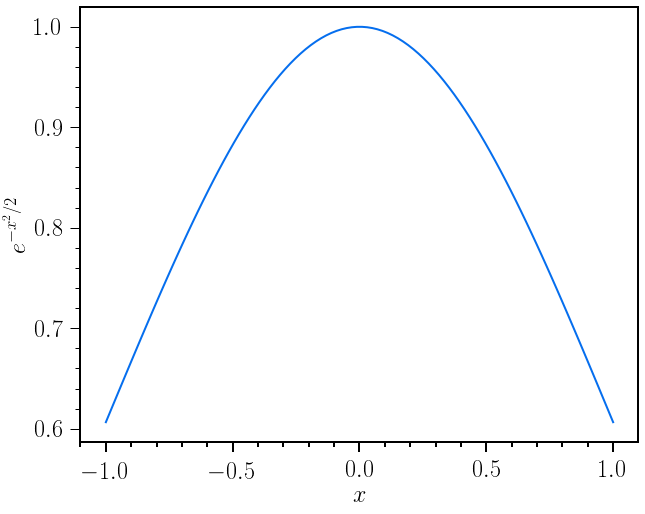

In [21]:
pl.plot(x, gauss)
pl.xlabel(r'$x$')
pl.ylabel(r'$e^{-x^2/2}$')
pl.show()

Now, let's save this data!

In [26]:
 np.array([x,gauss]).T

array([[-1.        ,  0.60653066],
       [-0.97979798,  0.61878213],
       [-0.95959596,  0.63102348],
       [-0.93939394,  0.64324443],
       [-0.91919192,  0.65543451],
       [-0.8989899 ,  0.66758309],
       [-0.87878788,  0.6796794 ],
       [-0.85858586,  0.69171252],
       [-0.83838384,  0.70367144],
       [-0.81818182,  0.71554503],
       [-0.7979798 ,  0.72732208],
       [-0.77777778,  0.7389913 ],
       [-0.75757576,  0.75054136],
       [-0.73737374,  0.76196092],
       [-0.71717172,  0.77323858],
       [-0.6969697 ,  0.78436298],
       [-0.67676768,  0.79532277],
       [-0.65656566,  0.80610665],
       [-0.63636364,  0.81670336],
       [-0.61616162,  0.82710174],
       [-0.5959596 ,  0.83729073],
       [-0.57575758,  0.84725938],
       [-0.55555556,  0.85699689],
       [-0.53535354,  0.86649261],
       [-0.51515152,  0.87573605],
       [-0.49494949,  0.88471696],
       [-0.47474747,  0.89342527],
       [-0.45454545,  0.90185116],
       [-0.43434343,

In [27]:
np.savetxt('data/gauss.txt', np.array([x,gauss]).T) #transpose makes the file formatting look right

Two ways of loading it back in with `numpy`:

In [28]:
array = np.loadtxt('data/gauss.txt')
print(array)

[[-1.          0.60653066]
 [-0.97979798  0.61878213]
 [-0.95959596  0.63102348]
 [-0.93939394  0.64324443]
 [-0.91919192  0.65543451]
 [-0.8989899   0.66758309]
 [-0.87878788  0.6796794 ]
 [-0.85858586  0.69171252]
 [-0.83838384  0.70367144]
 [-0.81818182  0.71554503]
 [-0.7979798   0.72732208]
 [-0.77777778  0.7389913 ]
 [-0.75757576  0.75054136]
 [-0.73737374  0.76196092]
 [-0.71717172  0.77323858]
 [-0.6969697   0.78436298]
 [-0.67676768  0.79532277]
 [-0.65656566  0.80610665]
 [-0.63636364  0.81670336]
 [-0.61616162  0.82710174]
 [-0.5959596   0.83729073]
 [-0.57575758  0.84725938]
 [-0.55555556  0.85699689]
 [-0.53535354  0.86649261]
 [-0.51515152  0.87573605]
 [-0.49494949  0.88471696]
 [-0.47474747  0.89342527]
 [-0.45454545  0.90185116]
 [-0.43434343  0.90998505]
 [-0.41414141  0.91781764]
 [-0.39393939  0.92533992]
 [-0.37373737  0.93254319]
 [-0.35353535  0.93941905]
 [-0.33333333  0.94595947]
 [-0.31313131  0.95215675]
 [-0.29292929  0.95800356]
 [-0.27272727  0.96349297]
 

In [29]:
x, gauss = np.loadtxt('data/gauss.txt', unpack = True)
print(x, gauss)

[-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172 -0.6969697  -0.67676768 -0.65656566
 -0.63636364 -0.61616162 -0.5959596  -0.57575758 -0.55555556 -0.53535354
 -0.51515152 -0.49494949 -0.47474747 -0.45454545 -0.43434343 -0.41414141
 -0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111 -0.09090909 -0.07070707 -0.05050505
 -0.03030303 -0.01010101  0.01010101  0.03030303  0.05050505  0.07070707
  0.09090909  0.11111111  0.13131313  0.15151515  0.17171717  0.19191919
  0.21212121  0.23232323  0.25252525  0.27272727  0.29292929  0.31313131
  0.33333333  0.35353535  0.37373737  0.39393939  0.41414141  0.43434343
  0.45454545  0.47474747  0.49494949  0.51515152  0.53535354  0.55555556
  0.57575758  0.5959596   0.61616162  0.63636364  0.